# Installling Libraries



In [17]:
!pip install pdfplumber #pdfplumber is a Python library used to extract text, tables, and metadata from PDF files.
!pip install PyPDF2 #supports operations like reading, writing, merging, splitting, encrypting, and extracting text from PDF files.

# Importing Required Libraries

In [18]:
import pdfplumber
from PyPDF2 import PdfReader, PdfWriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import re

In [19]:
# Finding Pages with Tables from publication-aut-pb-insurance-databse.pdf

pdf_path = "publication-aut-pb-auto-insurance-database.pdf"

# Find pages with tables
pages_with_tables = []
with pdfplumber.open(pdf_path) as pdf:
    for i, page in enumerate(pdf.pages, start=1):
        tables = page.extract_tables()
        if tables and len(tables) > 0:
            pages_with_tables.append(i)

print(f"Pages with tables: {pages_with_tables}")

Pages with tables: [15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 188, 189, 192, 195, 196, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 227, 228, 229]


In [20]:
# Extracting Tables from publication-aut-pb-insurance-databse.pdf and save in pages_with_tables.pdf

# Path to save the extracted pages
output_pdf_path = "pages_with_tables.pdf"

# Save only the relevant pages
reader = PdfReader(pdf_path)
writer = PdfWriter()

for page_number in pages_with_tables:
    writer.add_page(reader.pages[page_number - 1])  # Page numbers are 0-indexed

# Write to output PDF
with open(output_pdf_path, "wb") as f:
    writer.write(f)

print(f"Pages with tables saved to {output_pdf_path}")


Pages with tables saved to pages_with_tables.pdf


In [22]:
# Converted Pages_with_pdf to dinal_data.xlsx.

# Data preparation - EDA

# Processing Excel Tables into a Premiums DataFrame

In [23]:
file_path = "final_data.xlsx"

# Define the tables and premium types from starting tables
tables_info = {
    "Table 2": "Liability Written Premiums",
    "Table 3": "Liability Written Exposures",
    "Table 4": "Liability Average Premium",
    "Table 5": "Collision Written Premiums",
    "Table 6": "Collision Written Exposures",
    "Table 7": "Collision Average Premiums",
    "Table 8": "Comprehensive Written Premiums",
    "Table 9": "Comprehensive Written Exposures",
    "Table 10": "Comprehensive Average Premiums",
    "Table 11": "Average Expenditure",
    "Table 12": "Combined Average Premiums",
}


combined_data = []
for table_name, premium_type in tables_info.items():
    print(f"Processing {table_name} - {premium_type}...")
    table_data = pd.read_excel(file_path, sheet_name=table_name)

    # Set the 3rd row as a header
    table_data.columns = table_data.iloc[2]
    table_data = table_data[3:].reset_index(drop=True)

    # Rename columns
    table_data.rename(columns={col: str(col).strip() for col in table_data.columns}, inplace=True)
    table_data.rename(columns={"STATE": "state"}, inplace=True)

    # Add new column premium type
    table_data["premium_type"] = premium_type

    # Clean numeric columns - remove commas, convert to float
    numeric_cols = ['2021', '2020', '2019', '2018', '2017']
    for col in numeric_cols:
        if col in table_data.columns:
            table_data[col] = (
                table_data[col]
                .astype(str)
                .str.replace(",", " ")
                .astype(float)
            )

    # Append cleaned data to combined list
    combined_data.append(table_data)

# Concatenate all tables into one DataFrame
premium_data = pd.concat(combined_data, ignore_index=True)

# Clean column names to ensure consistency
premium_data.columns = [
    col.strip().lower().replace(" ", "_").replace(".0", "") for col in premium_data.columns
]

# Disable scientific notation
pd.set_option("display.float_format", "{:,.2f}".format)

# cleaned combined data
print("\n--- Final Cleaned Combined Data ---")
print(premium_data.head())

Processing Table 2 - Liability Written Premiums...
Processing Table 3 - Liability Written Exposures...
Processing Table 4 - Liability Average Premium...
Processing Table 5 - Collision Written Premiums...
Processing Table 6 - Collision Written Exposures...
Processing Table 7 - Collision Average Premiums...
Processing Table 8 - Comprehensive Written Premiums...
Processing Table 9 - Comprehensive Written Exposures...
Processing Table 10 - Comprehensive Average Premiums...
Processing Table 11 - Average Expenditure...
Processing Table 12 - Combined Average Premiums...

--- Final Cleaned Combined Data ---
        state              2021              2020              2019  \
0     Alabama  2,114,505,785.00  2,013,154,368.00  1,999,354,066.00   
1      Alaska    279,770,779.00    274,943,211.00    281,024,721.00   
2     Arizona  3,432,250,368.00  3,277,805,285.00  3,254,131,365.00   
3    Arkansas  1,098,109,697.00  1,059,399,388.00  1,055,331,776.00   
4  California 17,216,108,489.00 17,402

In [24]:
#data saving to premium_data.xlsx
premium_data.to_excel("premium_data.xlsx", index=False)
print("data saved to 'premium_data.xlsx'.")

data saved to 'premium_data.xlsx'.


# Processing Excel Tables into 2 Claim Datasets


*   Incurred Losses, Frequency, Earned Premiums, Pure Premium - Dataset1
*   Incurred Claims, Severity, Earned Exposures, Loss Ratio - Dataset2



In [25]:

# Define left side keywords to filter tables
keywords = ["Incurred Losses", "Frequency", "Earned Premiums", "Pure Premium"]

processed_tables = []

# Loop through all table numbers 13 to 159
for table_number in range(13, 160):
    sheet_name = f"Table {table_number}"
    try:

        raw_table_data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

        # Extract heading and subheading from Row 2 and Row 3
        raw_heading = raw_table_data.iloc[2, 0] if not pd.isnull(raw_table_data.iloc[2, 0]) else "Unknown Heading"
        cleaned_heading = re.sub(r"\s*\d{4}-\d{4}", "", str(raw_heading)).strip()  # Remove "2018-2020"
        parts = cleaned_heading.split("\n", 1)  # Split into two parts
        liability_type = parts[0].strip() if len(parts) > 0 else "Unknown"
        business_type = parts[1].strip() if len(parts) > 1 else "Unknown"

        # Check for the presence of keywords in column headers
        table_data_incurred = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=3)
        for keyword in keywords:
            if any(keyword in str(col) for col in table_data_incurred.columns):

                table_data_incurred.rename(columns={"STATE": "state"}, inplace=True)

                # Add columns liability type, business type, and data category
                table_data_incurred["liability_type"] = liability_type
                table_data_incurred["business_type"] = business_type
                table_data_incurred["data_category"] = keyword

                # Handle missing columns: Add missing columns with NaN values
                required_columns_incurred = ["state", "liability_type", "business_type", "data_category"]
                for col in required_columns_incurred:
                    if col not in table_data_incurred.columns:
                        table_data_incurred[col] = None

                processed_tables.append(table_data_incurred)

                print(f"Processed {sheet_name} for keyword: '{keyword}' with liability type: '{liability_type}' and business type: '{business_type}'")


    except Exception as e:
        print(f"Error processing {sheet_name}: {e}")

# Combine all data
if processed_tables:
    combined_claims_data = pd.concat(processed_tables, ignore_index=True)
    combined_claims_data.reset_index(drop=True, inplace=True)

    print("\n--- Final Combined and Filtered Claims Data ---")
    print(combined_claims_data.head())
else:
    print("No valid data found in the specified tables.")

#Save the cleaned dataset to an Excel file
output_path = "processed_claims_data_with_category.xlsx"
combined_claims_data.to_excel(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")


Processed Table 13 for keyword: 'Earned Premiums' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 14 for keyword: 'Incurred Losses' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 15 for keyword: 'Pure Premium' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 16 for keyword: 'Frequency' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 17 for keyword: 'Earned Premiums' with liability type: 'Bodily Injury Liability' and business type: 'Residual Business'
Processed Table 18 for keyword: 'Incurred Losses' with liability type: 'Bodily Injury Liability' and business type: 'Residual Business'
Processed Table 19 for keyword: 'Pure Premium' with liability type: 'Bodily Injury Liability' and business type: 'Residual Business'
Processed Table 20 for keyword: 'Frequency' with liabili

In [26]:
# Define right side keywords to filter tables
keywords = ["Incurred Claims", "Severity", "Earned Exposures", "Loss Ratio"]

processed_tables = []

# Loop through all table 13 to 159
for table_number in range(13, 160):
    sheet_name = f"Table {table_number}"
    try:
        raw_table_data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

        # Extract heading and subheading from Row 2 and Row 3
        raw_heading = raw_table_data.iloc[2, 0] if not pd.isnull(raw_table_data.iloc[2, 0]) else "Unknown Heading"
        cleaned_heading = re.sub(r"\s*\d{4}-\d{4}", "", str(raw_heading)).strip()  # Remove "2018-2020"
        parts = cleaned_heading.split("\n", 1)  # Split into two parts
        liability_type = parts[0].strip() if len(parts) > 0 else "Unknown"
        business_type = parts[1].strip() if len(parts) > 1 else "Unknown"


        table_data_incurred = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=3)
        for keyword in keywords:
            if any(keyword in str(col) for col in table_data_incurred.columns):

                table_data_incurred.rename(columns={"STATE": "state"}, inplace=True)

                # Add columns liability type, business type, and data category
                table_data_incurred["liability_type"] = liability_type
                table_data_incurred["business_type"] = business_type
                table_data_incurred["data_category"] = keyword

                # Handle missing columns: Add missing columns with NaN values
                required_columns_incurred = ["state", "liability_type", "business_type", "data_category"]
                for col in required_columns_incurred:
                    if col not in table_data_incurred.columns:
                        table_data_incurred[col] = None

                processed_tables.append(table_data_incurred)

                print(f"Processed {sheet_name} for keyword: '{keyword}' with liability type: '{liability_type}' and business type: '{business_type}'")


    except Exception as e:
        print(f"Error processing {sheet_name}: {e}")

# Combine data
if processed_tables:
    combined_claims_data = pd.concat(processed_tables, ignore_index=True)
    combined_claims_data.reset_index(drop=True, inplace=True)

    print("\n--- Final Combined and Filtered Claims Data ---")
    print(combined_claims_data.head())
else:
    print("No valid data found in the specified tables.")

#Save the cleaned dataset to an Excel file
output_path = "processed_claims_data_with_category1.xlsx"
combined_claims_data.to_excel(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")




Processed Table 13 for keyword: 'Earned Exposures' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 14 for keyword: 'Incurred Claims' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 15 for keyword: 'Loss Ratio' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 16 for keyword: 'Severity' with liability type: 'Bodily Injury Liability' and business type: 'Voluntary Business'
Processed Table 17 for keyword: 'Earned Exposures' with liability type: 'Bodily Injury Liability' and business type: 'Residual Business'
Processed Table 18 for keyword: 'Incurred Claims' with liability type: 'Bodily Injury Liability' and business type: 'Residual Business'
Processed Table 19 for keyword: 'Loss Ratio' with liability type: 'Bodily Injury Liability' and business type: 'Residual Business'
Processed Table 20 for keyword: 'Severity' with liability t

In [27]:
df = pd.read_excel("processed_claims_data_with_category.xlsx")
df.head()

df1 = pd.read_excel("processed_claims_data_with_category1.xlsx")
df1.head()

,Unnamed: 0,Earned Premiums,Unnamed: 2,Unnamed: 3,Unnamed: 4,Earned Exposures,Unnamed: 6,Unnamed: 7,liability_type,business_type,...,Incurred Losses - Property Damage,Incurred Claims - Property Damage,Pure Premium - Bodily Injury Component,Loss Ratio - Bodily Injury Component,Pure Premium - Property Damage Component,Loss Ratio - Property Damage Component,Frequency - Bodily Injury Component,Severity - Bodily Injury Component,Frequency - Property Damage Component,Severity - Property Damage Component
0,STATE,2020,2019,2018,2020,NaN,2019,2018,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,838940234,804762315,759148322,3840305,NaN,3723860,3676579,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,107947789,105731617,104915345,487209,NaN,470738,458838,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,1442820492,1371145218,1264881560,4756829,NaN,4523914,4317624,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,367687379,353650300,341445314,1974945,NaN,1886496,1849645,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                5346 non-null   object 
 1   Earned Premiums                           807 non-null    object 
 2   Unnamed: 2                                3372 non-null   object 
 3   Unnamed: 3                                6729 non-null   object 
 4   Unnamed: 4                                5276 non-null   object 
 5   Earned Exposures                          0 non-null      float64
 6   Unnamed: 6                                5062 non-null   object 
 7   Unnamed: 7                                6329 non-null   object 
 8   liability_type                            6804 non-null   object 
 9   business_type                             6804 non-null   object 
 10  data_category                       

In [29]:
# clean the dataframe
def clean_dataframe(df):
    # Make the first row header
    df.columns = df.iloc[0]
    df = df[1:]

    return df


# Clean both dataframes
cleaned_df1 = clean_dataframe(df)
cleaned_df2 = clean_dataframe(df1)

cleaned_df1.head()
cleaned_df2.head()

,STATE,2020,2019,2018,2020,NaN,2019,2018,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,838940234,804762315,759148322,3840305,NaN,3723860,3676579,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,107947789,105731617,104915345,487209,NaN,470738,458838,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,1442820492,1371145218,1264881560,4756829,NaN,4523914,4317624,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,367687379,353650300,341445314,1974945,NaN,1886496,1849645,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,California,7562779157,7495604548,7258581340,27938949,NaN,27692170,27189967,Bodily Injury Liability,Voluntary Business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Selecting useful columns for cleaned_df1
columns_df1 = [0, 1, 2, 3, 8, 9, 10]

# Selecting useful columns for cleaned_df2
columns_df2 = [0, 4, 6, 7, 8, 9, 10]

# Create cleaned DataFrames by selecting specified columns
cleaned_df1 = cleaned_df1.iloc[:, columns_df1]
cleaned_df2 = cleaned_df2.iloc[:, columns_df2]

In [31]:
# Rename columns for indices 4, 5, and 6 in cleaned_df1
cleaned_df1.rename(columns={
    cleaned_df1.columns[4]: "liability_type",
    cleaned_df1.columns[5]: "business_type",
    cleaned_df1.columns[6]: "data_category"
}, inplace=True)
cleaned_df2.rename(columns={
    cleaned_df2.columns[4]: "liability_type",
    cleaned_df2.columns[5]: "business_type",
    cleaned_df2.columns[6]: "data_category"
}, inplace=True)


In [32]:
# Save the final cleaned claim datasets to Excel files
cleaned_df1.to_excel("claim_dataset.xlsx", index=False)
cleaned_df2.to_excel("claim_dataset1.xlsx", index=False)

print("The datasets have been saved as 'claim_dataset.xlsx' and 'claim_dataset1.xlsx'.")

The datasets have been saved as 'claim_dataset.xlsx' and 'claim_dataset1.xlsx'.


# Loading Dataset Premium

In [33]:
premium_data = pd.read_excel("premium_data.xlsx")

# Remove commas, dollar signs, convert to numeric
columns_to_clean = ['2021', '2020', '2019', '2018', '2017']
for column in columns_to_clean:
    premium_data[column] = premium_data[column].replace({',': '', '\\$': ''}, regex=True).astype(float)

# Check for missing values and handle them (if any)
missing_values_summary = premium_data.isnull().sum()

# Display the cleaned data and missing value summary
cleaned_data_preview = premium_data.head()
missing_values_summary, cleaned_data_preview


(state           0
 2021            0
 2020            0
 2019            0
 2018            0
 2017            0
 premium_type    0
 dtype: int64,
         state              2021              2020              2019  \
 0     Alabama  2,114,505,785.00  2,013,154,368.00  1,999,354,066.00   
 1      Alaska    279,770,779.00    274,943,211.00    281,024,721.00   
 2     Arizona  3,432,250,368.00  3,277,805,285.00  3,254,131,365.00   
 3    Arkansas  1,098,109,697.00  1,059,399,388.00  1,055,331,776.00   
 4  California 17,216,108,489.00 17,402,826,342.00 17,607,088,343.00   
 
                2018              2017                premium_type  
 0  1,940,946,609.00  1,792,450,953.00  Liability Written Premiums  
 1    273,643,422.00    265,497,418.00  Liability Written Premiums  
 2  3,073,218,620.00  2,730,348,482.00  Liability Written Premiums  
 3  1,041,730,855.00    978,445,584.00  Liability Written Premiums  
 4 16,914,871,327.00 15,196,443,886.00  Liability Written Premiums  )

In [34]:
premium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         572 non-null    object 
 1   2021          572 non-null    float64
 2   2020          572 non-null    float64
 3   2019          572 non-null    float64
 4   2018          572 non-null    float64
 5   2017          572 non-null    float64
 6   premium_type  572 non-null    object 
dtypes: float64(5), object(2)
memory usage: 31.4+ KB


In [35]:
premium_data.shape

(572, 7)

In [36]:
# Summary Statistics
print("\n--- Summary Statistics by Premium Type ---")
summary_stats = premium_data.describe()
print(summary_stats)


--- Summary Statistics by Premium Type ---
                    2021               2020               2019  \
count             572.00             572.00             572.00   
mean      862,986,746.96     829,681,495.23     837,588,550.00   
std     6,996,746,088.98   6,769,418,641.78   6,870,037,181.96   
min                99.11              97.27              96.53   
25%               693.40             694.26             706.00   
50%           737,259.00         714,808.00         708,073.00   
75%       147,328,646.50     137,085,463.25     134,097,763.75   
max   146,667,392,807.00 142,715,528,701.00 145,256,432,932.00   

                    2018               2017  
count             572.00             572.00  
mean      815,975,562.56     762,416,344.33  
std     6,705,581,318.45   6,257,028,906.78  
min                94.76              96.15  
25%               688.99             665.99  
50%           694,865.00         683,660.00  
75%       126,106,640.25     118,659,17

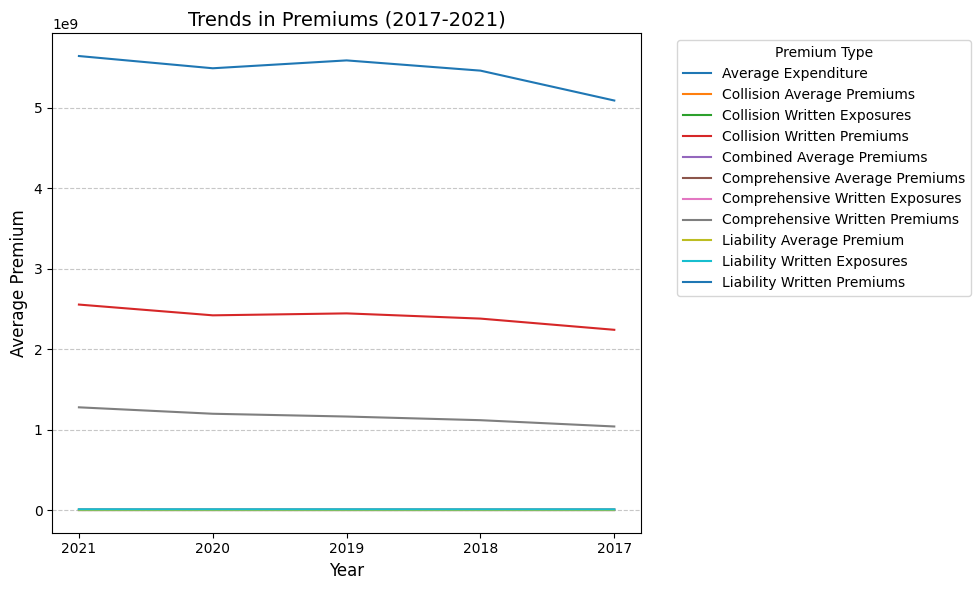

In [37]:
# Visualize trends over the years
premium_trends = premium_data.groupby('premium_type')[['2021', '2020', '2019', '2018', '2017']].mean().T

# Plot trends for premium types
plt.figure(figsize=(10, 6))
for premium_type in premium_trends.columns:
    plt.plot(premium_trends.index, premium_trends[premium_type], label=premium_type)

plt.title('Trends in Premiums (2017-2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Premium', fontsize=12)
plt.legend(title='Premium Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

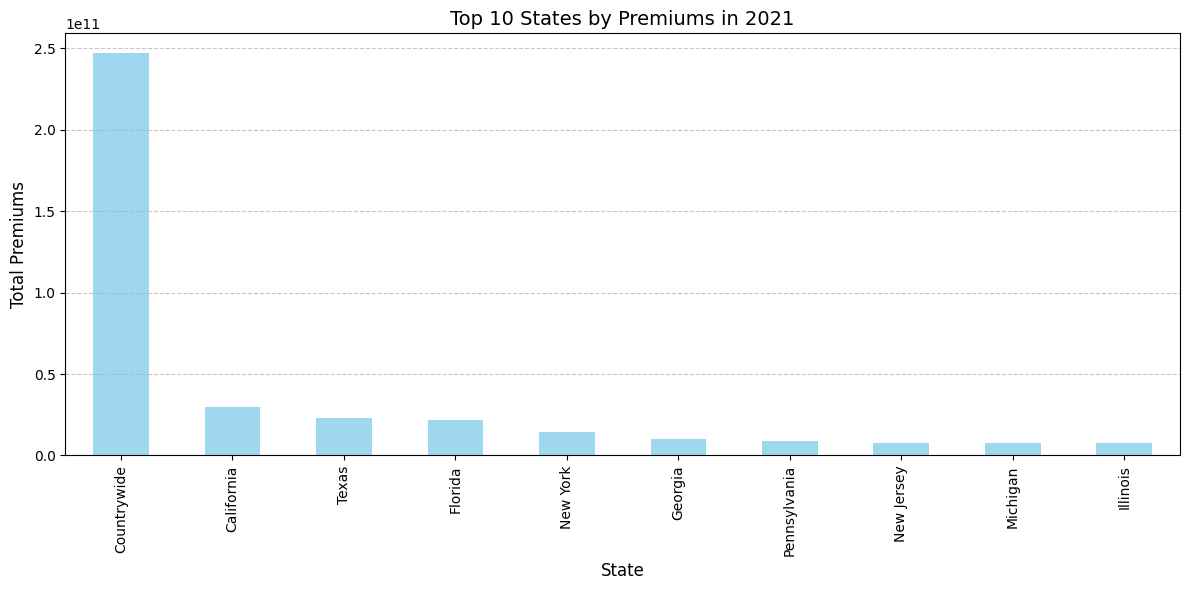

In [38]:
# Bar chart for state-wise comparisons (2021 data)
plt.figure(figsize=(12, 6))
state_premiums = premium_data[premium_data['2021'] > 0]  # Filter out invalid data
state_premiums = state_premiums.groupby('state')['2021'].sum().sort_values(ascending=False).head(10)

state_premiums.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Top 10 States by Premiums in 2021', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Premiums', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


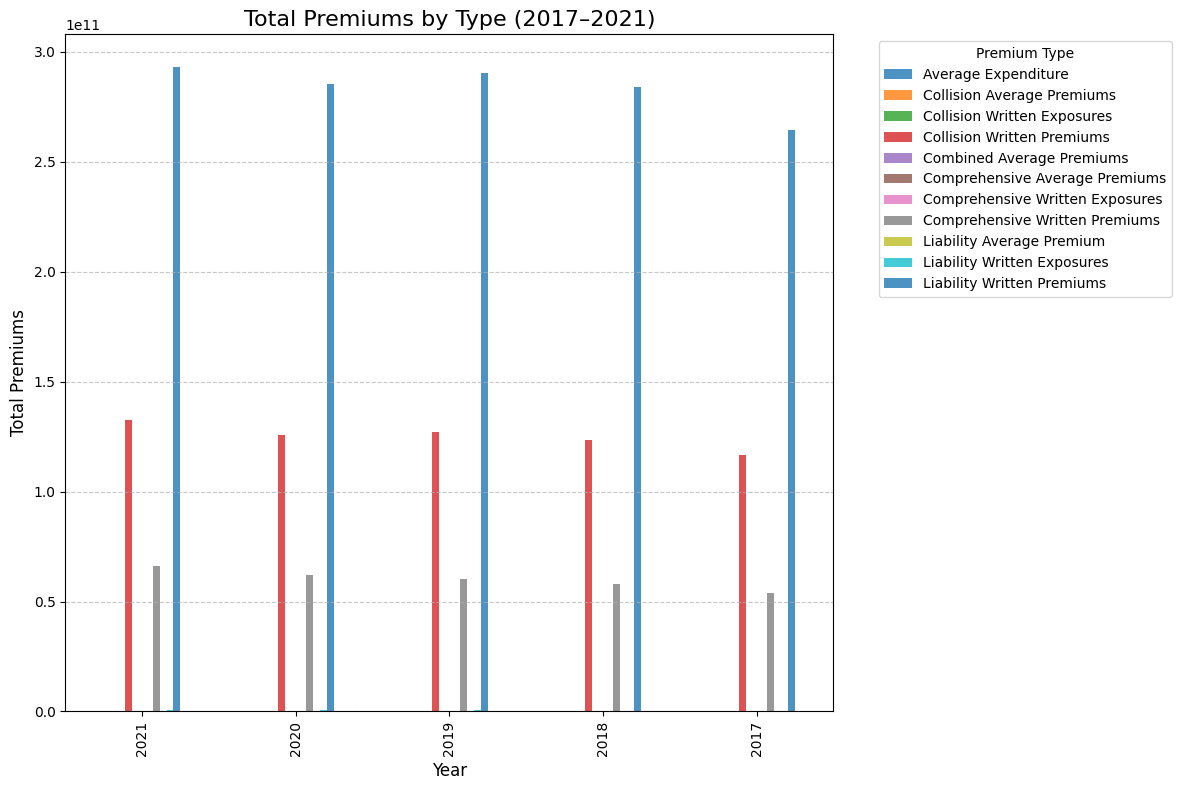

                                              2021               2020  \
premium_type                                                            
Average Expenditure                      52,220.95          51,601.48   
Collision Average Premiums               18,263.41          17,957.21   
Collision Written Exposures         351,806,948.00     339,459,648.00   
Collision Written Premiums      132,748,948,746.00 125,796,466,922.00   
Combined Average Premiums                58,870.36          58,337.84   
Comprehensive Average Premiums           10,170.22           9,907.77   
Comprehensive Written Exposures     369,002,750.00     357,077,004.00   
Comprehensive Written Premiums   66,359,811,376.00  62,201,136,622.00   
Liability Average Premium                30,436.75          30,472.92   
Liability Written Exposures         463,893,868.00     452,449,396.00   
Liability Written Premiums      293,334,785,614.00 285,431,057,402.00   

                                              2019

In [45]:
# Group premiums by premium type and year
annual_premium_totals = premium_data.groupby('premium_type')[['2021', '2020', '2019', '2018', '2017']].sum()

# Plot yearly distribution of premiums by type
annual_premium_totals.T.plot(kind='bar', figsize=(12, 8), alpha=0.8)
plt.title('Total Premiums by Type (2017–2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Premiums', fontsize=12)
plt.legend(title='Premium Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(annual_premium_totals)


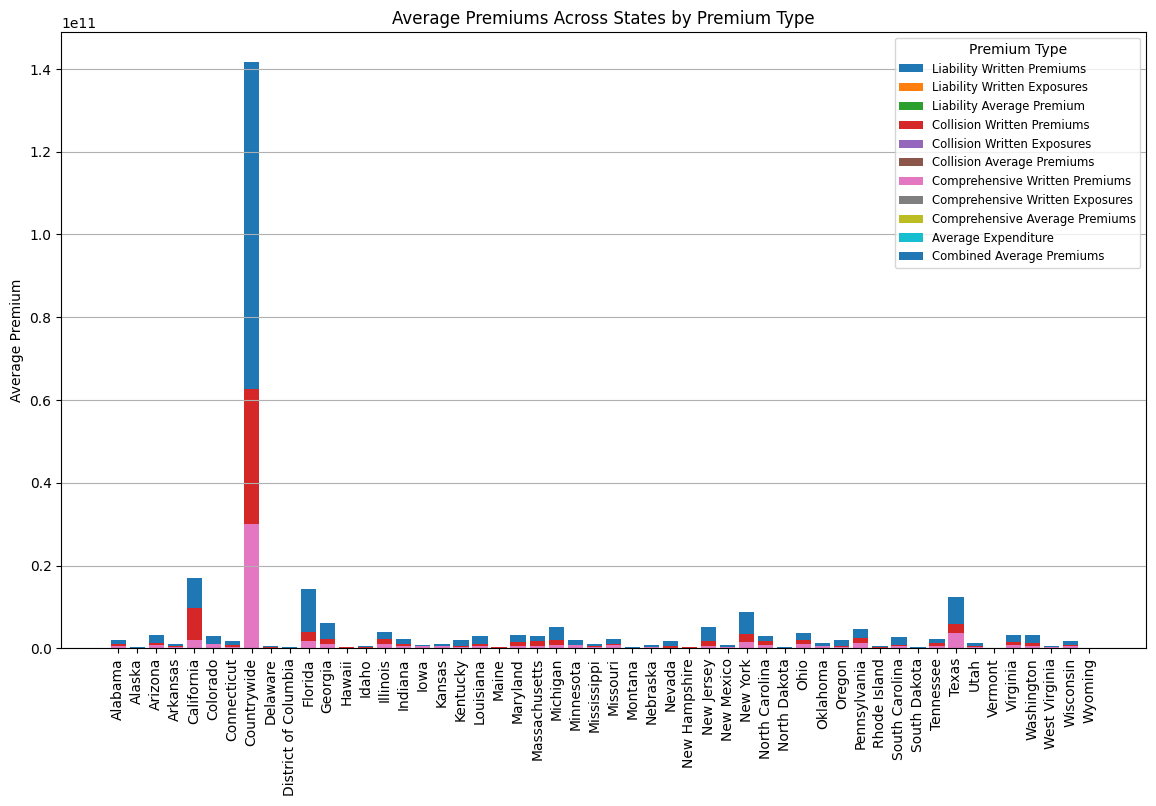

In [44]:
# Average Premiums Across States ---
state_premiums = premium_data.groupby(["state", "premium_type"])[['2021', '2020', '2019', '2018', '2017']].mean()

plt.figure(figsize=(14, 8))
state_premiums = state_premiums.reset_index()
for premium_type in premium_data["premium_type"].unique():
    type_data = state_premiums[state_premiums["premium_type"] == premium_type]
    avg_state_premiums = type_data[['2021', '2020', '2019', '2018', '2017']].mean(axis=1)
    plt.bar(type_data["state"], avg_state_premiums, label=premium_type)

plt.title("Average Premiums Across States by Premium Type")
plt.ylabel("Average Premium")
plt.xticks(rotation=90)
plt.legend(loc="upper right", fontsize="small", title="Premium Type")
plt.grid(axis="y")
plt.show()


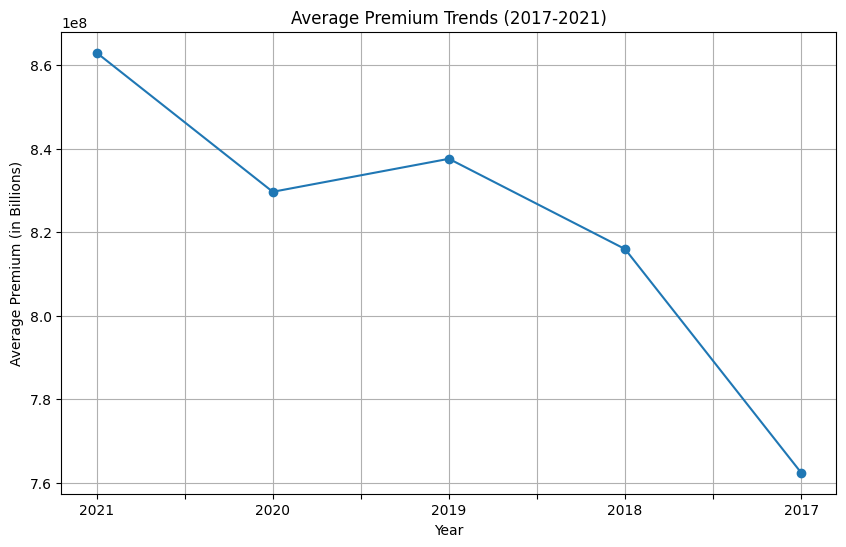

In [43]:
# Calculate summary statistics for annual premiums
summary_stats = premium_data.describe()

premium_data_mean = premium_data[['2021', '2020', '2019', '2018', '2017']].mean()

plt.figure(figsize=(10, 6))
premium_data_mean.plot(kind='line', marker='o', title='Average Premium Trends (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Average Premium (in Billions)')
plt.grid(True)
plt.show()


# Handles Missing Values and Outliers

In [49]:
# Check for missing values
missing_values = premium_data.isnull().sum()

# Identify outliers using IQR
Q1 = premium_data[['2021', '2020', '2019', '2018', '2017']].quantile(0.25)
Q3 = premium_data[['2021', '2020', '2019', '2018', '2017']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((premium_data[['2021', '2020', '2019', '2018', '2017']] < (Q1 - 1.5 * IQR)) |
            (premium_data[['2021', '2020', '2019', '2018', '2017']] > (Q3 + 1.5 * IQR))).sum()



In [51]:
# Capping outliers to 1.5 * IQR range
for col in ['2021', '2020', '2019', '2018', '2017']:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    premium_data[col] = premium_data[col].clip(lower=lower_bound, upper=upper_bound)


scaler = MinMaxScaler()
premium_data[['2021', '2020', '2019', '2018', '2017']] = scaler.fit_transform(
    premium_data[['2021', '2020', '2019', '2018', '2017']]
)


print("Missing Values:\n", missing_values)
print("Outliers:\n", outliers)
print("Preprocessed Premium Data:\n", premium_data.head())

Missing Values:
 state           0
2021            0
2020            0
2019            0
2018            0
2017            0
premium_type    0
dtype: int64
Outliers:
 2021    0
2020    0
2019    0
2018    0
2017    0
dtype: int64
Preprocessed Premium Data:
         state  2021  2020  2019  2018  2017                premium_type
0     Alabama  1.00  1.00  1.00  1.00  1.00  Liability Written Premiums
1      Alaska  0.76  0.80  0.84  0.87  0.89  Liability Written Premiums
2     Arizona  1.00  1.00  1.00  1.00  1.00  Liability Written Premiums
3    Arkansas  1.00  1.00  1.00  1.00  1.00  Liability Written Premiums
4  California  1.00  1.00  1.00  1.00  1.00  Liability Written Premiums


# Predictive Modeling

In [52]:
X = pd.get_dummies(premium_data[['state']], drop_first=True)  # One-hot encode the 'state' column
y = premium_data[['2021']]  # Target variable: normalized premiums for 2021

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train.values.ravel())
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Results
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "R^2 Score": [lr_r2, rf_r2]
})

print("Model Comparison for Premium Prediction")
model_comparison


Model Comparison for Premium Prediction


,Model,RMSE,R^2 Score
0,Linear Regression,0.44,-0.30
1,Random Forest,0.44,-0.31


In [53]:
# Feature engineering: Add mean premiums across years as a new feature
premium_data['avg_premium'] = premium_data[['2021', '2020', '2019', '2018', '2017']].mean(axis=1)

premium_data_encoded = pd.get_dummies(premium_data, columns=['premium_type'], drop_first=True)

X = pd.concat([pd.get_dummies(premium_data_encoded['state'], drop_first=True),
               premium_data_encoded[['avg_premium']]], axis=1)
y = premium_data_encoded['2021']

# Split data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

# Random Forest model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

# Updated results
improved_model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "R^2 Score": [lr_r2, rf_r2]
})

print("Improved Model Comparison for Premium Prediction")
improved_model_comparison


Improved Model Comparison for Premium Prediction


,Model,RMSE,R^2 Score
0,Linear Regression,0.01,1.00
1,Random Forest,0.01,1.00


# Loaing Claim Datasets

In [57]:
file_path1 = 'claim_dataset.xlsx'
file_path2 = 'claim_dataset1.xlsx'

data1 = pd.read_excel(file_path1, sheet_name='Sheet1')
data2 = pd.read_excel(file_path2, sheet_name='Sheet1')

# Display basic info and preview of the datasets
data1_preview = data1.head()
data2_preview = data2.head()
print(data1_preview)
print(data2_preview)

        STATE        2020        2019        2018           liability_type  \
0     Alabama   838940234   804762315   759148322  Bodily Injury Liability   
1      Alaska   107947789   105731617   104915345  Bodily Injury Liability   
2     Arizona  1442820492  1371145218  1264881560  Bodily Injury Liability   
3    Arkansas   367687379   353650300   341445314  Bodily Injury Liability   
4  California  7562779157  7495604548  7258581340  Bodily Injury Liability   

        business_type    data_category  
0  Voluntary Business  Earned Premiums  
1  Voluntary Business  Earned Premiums  
2  Voluntary Business  Earned Premiums  
3  Voluntary Business  Earned Premiums  
4  Voluntary Business  Earned Premiums  
        STATE      2020      2019      2018           liability_type  \
0     Alabama   3840305   3723860   3676579  Bodily Injury Liability   
1      Alaska    487209    470738    458838  Bodily Injury Liability   
2     Arizona   4756829   4523914   4317624  Bodily Injury Liability 

In [58]:
data1_info = data1.info()
data2_info = data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STATE           5345 non-null   object
 1   2020            806 non-null    object
 2   2019            3371 non-null   object
 3   2018            6728 non-null   object
 4   liability_type  6803 non-null   object
 5   business_type   6803 non-null   object
 6   data_category   6803 non-null   object
dtypes: object(7)
memory usage: 372.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803 entries, 0 to 6802
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STATE           5345 non-null   object
 1   2020            5275 non-null   object
 2   2019            5061 non-null   object
 3   2018            6328 non-null   object
 4   liability_type  6803 non-null   object
 5   business_type   6803 non-null   objec

# EDA - Data Cleaning (Claim Data)

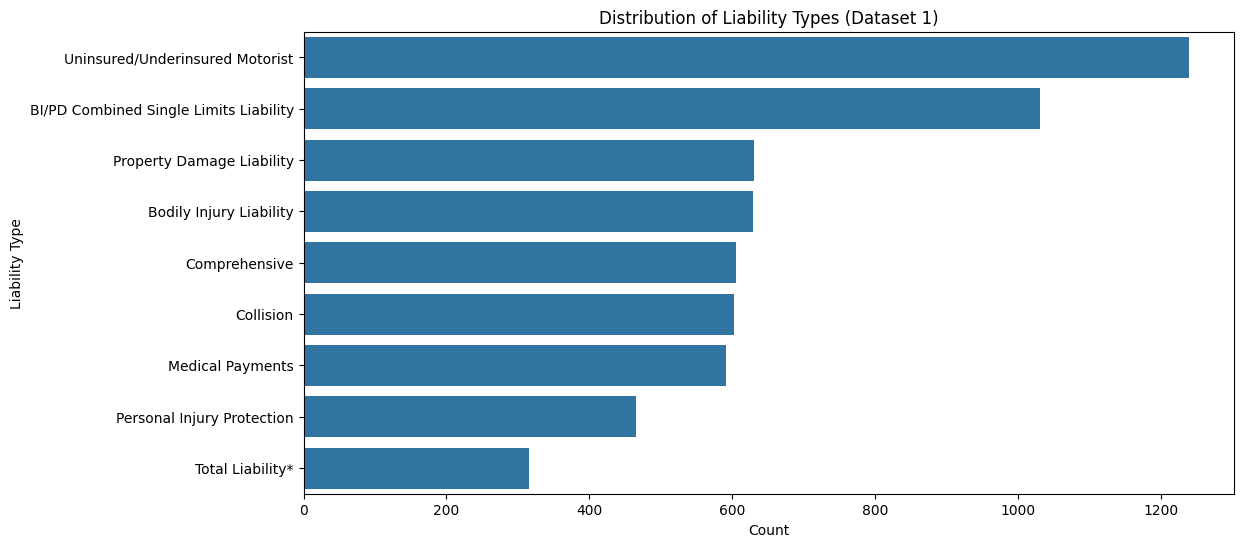

In [59]:
# Convert year columns to numeric
for year in [2020, 2019, 2018]:
    data1[year] = pd.to_numeric(data1[year], errors='coerce')
    data2[year] = pd.to_numeric(data2[year], errors='coerce')

# Data Cleaning: Dropping rows where all year data is missing in both datasets
data1_cleaned = data1.dropna(subset=[2020, 2019, 2018], how='all')
data2_cleaned = data2.dropna(subset=[2020, 2019, 2018], how='all')

# Distribution of `liability_type`
plt.figure(figsize=(12, 6))
sns.countplot(data=data1_cleaned, y='liability_type', order=data1_cleaned['liability_type'].value_counts().index)
plt.title('Distribution of Liability Types (Dataset 1)')
plt.xlabel('Count')
plt.ylabel('Liability Type')
plt.show()

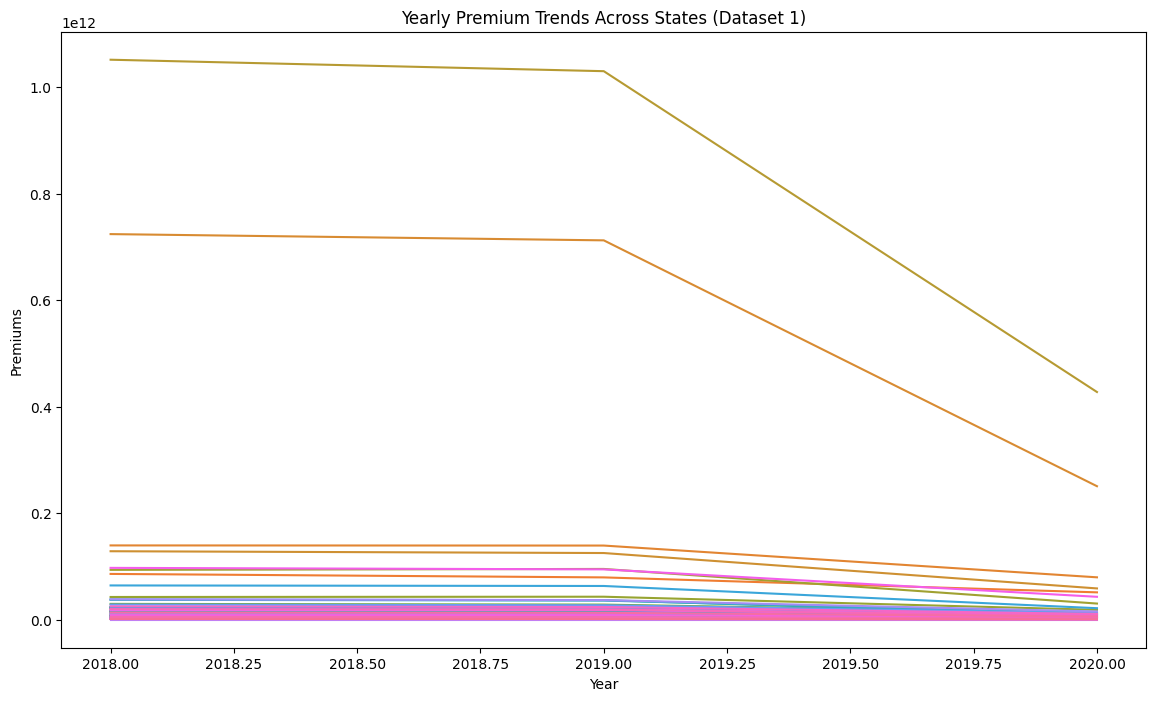

In [60]:
# Yearly trend analysis for Dataset 1 (Earned Premiums)
state_group = data1_cleaned.groupby('STATE')[[2020, 2019, 2018]].sum().reset_index()
state_group_melted = state_group.melt(id_vars='STATE', var_name='Year', value_name='Premiums')

plt.figure(figsize=(14, 8))
sns.lineplot(data=state_group_melted, x='Year', y='Premiums', hue='STATE', legend=None)
plt.title('Yearly Premium Trends Across States (Dataset 1)')
plt.xlabel('Year')
plt.ylabel('Premiums')
plt.show()

<ipython-input-61-9238f22fd866>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_comparison, x='STATE', y=2020, palette='viridis')


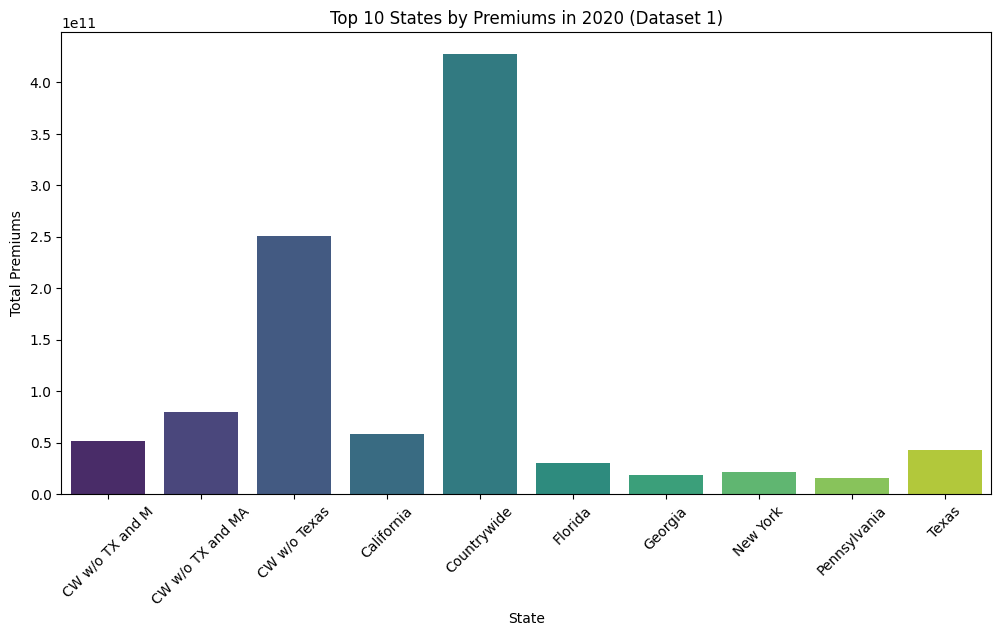

In [61]:
# State-wise comparison of total premiums (Dataset 1)
top_states = state_group.set_index('STATE').sum(axis=1).nlargest(10).index
state_comparison = state_group[state_group['STATE'].isin(top_states)]

plt.figure(figsize=(12, 6))
sns.barplot(data=state_comparison, x='STATE', y=2020, palette='viridis')
plt.title('Top 10 States by Premiums in 2020 (Dataset 1)')
plt.xlabel('State')
plt.ylabel('Total Premiums')
plt.xticks(rotation=45)
plt.show()

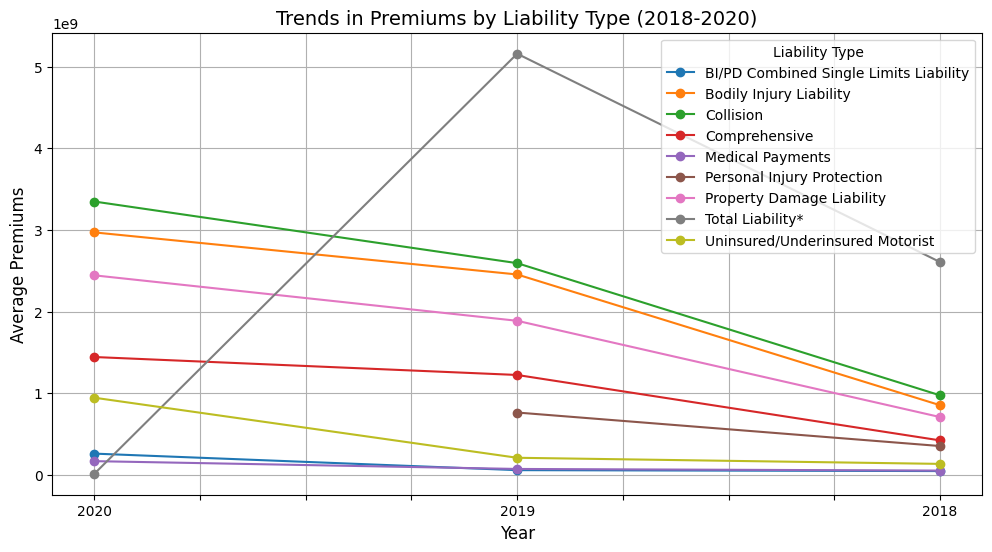

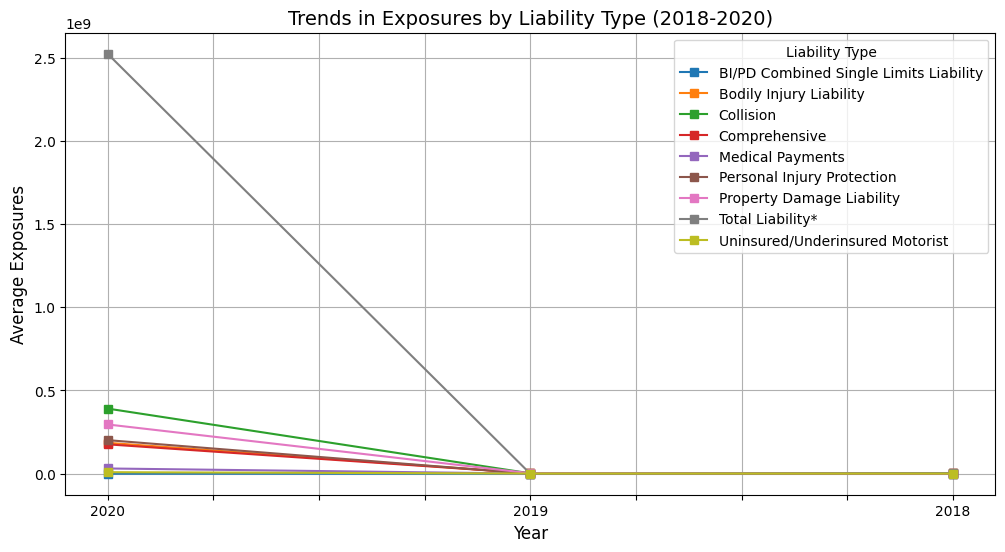

(                 STATE              2020
 5991       Countrywide 62,191,595,686.00
 5559       Countrywide 62,159,739,627.00
 5992      CW w/o Texas 56,398,058,382.00
 5560      CW w/o Texas 56,366,202,323.00
 483        Countrywide 55,218,026,692.00
 51         Countrywide 55,130,585,583.00
 484   CW w/o TX and MA 48,519,586,559.00
 52     CW w/o TX and M 48,456,087,277.00
 1131       Countrywide 45,634,175,358.00
 699        Countrywide 45,547,428,205.00,
               STATE     2020
 5294        Arizona     0.00
 2203          Texas     0.00
 5316    Mississippi     0.00
 2181  Massachusetts     0.00
 1317  Massachusetts     0.00
 5320         Nevada     0.00
 5302        Georgia     0.00
 1339          Texas     0.00
 5304          Idaho    16.00
 3274   North Dakota 1,152.00)

In [64]:
top_premium_states = data1_cleaned[['STATE', 2020]].sort_values(by=2020, ascending=False).head(10)
bottom_premium_states = data1_cleaned[['STATE', 2020]].sort_values(by=2020).head(10)

premium_trends_liability = data1_cleaned.groupby('liability_type')[[2020, 2019, 2018]].mean()
exposures_trends_liability = data2_cleaned.groupby('liability_type')[[2020, 2019, 2018]].mean()

# Plotting Premium Trends by Liability Type
premium_trends_liability.T.plot(figsize=(12, 6), marker='o')
plt.title('Trends in Premiums by Liability Type (2018-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Premiums', fontsize=12)
plt.legend(title='Liability Type')
plt.grid()
plt.show()

# Plotting Exposures Trends by Liability Type
exposures_trends_liability.T.plot(figsize=(12, 6), marker='s')
plt.title('Trends in Exposures by Liability Type (2018-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Exposures', fontsize=12)
plt.legend(title='Liability Type')
plt.grid()
plt.show()

# Displaying Top and Bottom States for Premiums
top_premium_states, bottom_premium_states


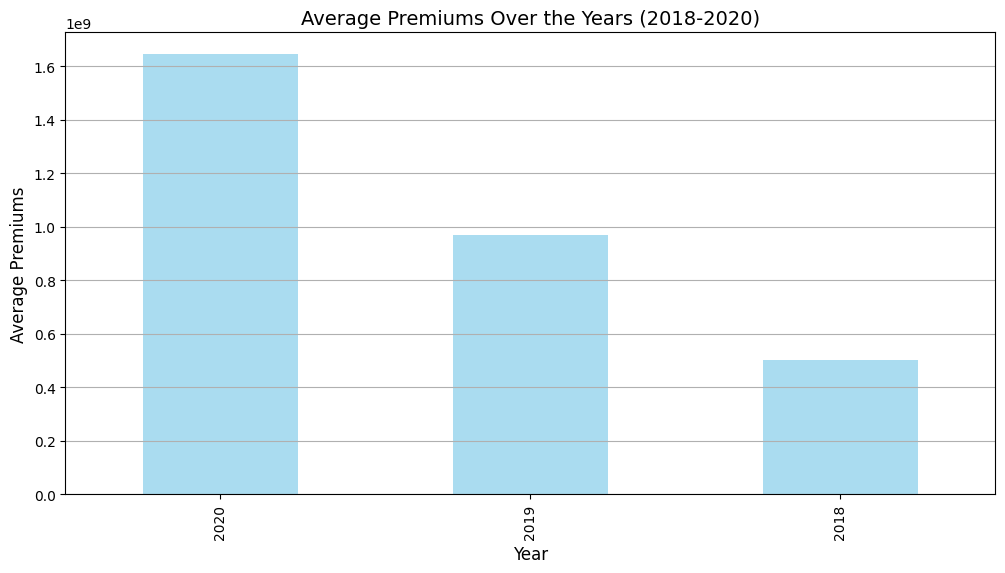

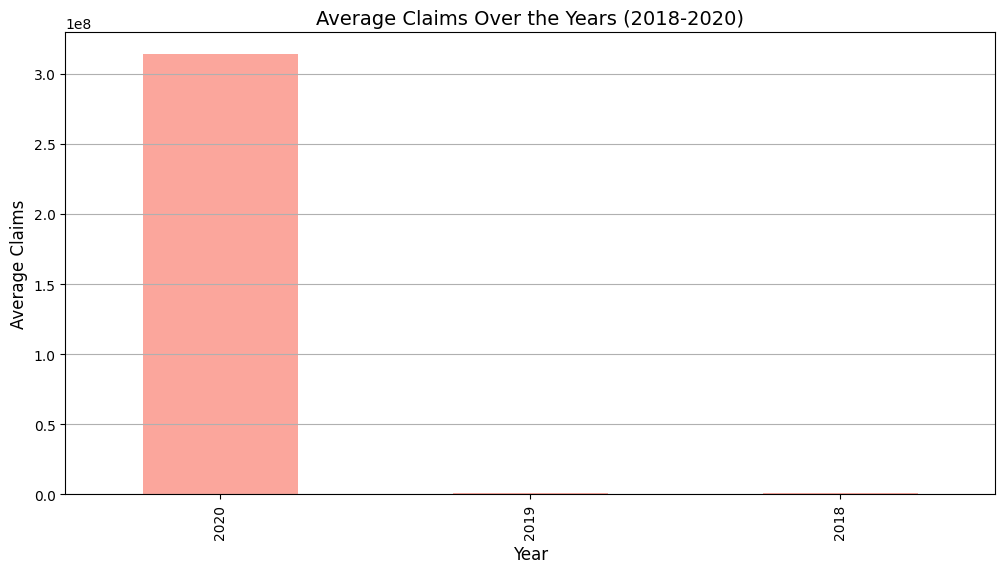

(                   2020               2019               2018
 count            752.00           3,078.00           6,090.00
 mean   1,644,265,791.34     971,459,849.49     501,097,966.77
 std    6,843,482,049.03   6,403,283,080.27   4,561,690,300.40
 min                0.00            -203.00          -1,283.00
 25%       63,338,983.00               3.05               0.82
 50%      238,960,788.00      12,286,447.00             171.11
 75%      769,536,992.00     290,013,783.25      27,338,231.00
 max   62,191,595,686.00 143,378,835,933.00 141,079,596,793.00,
                     2020           2019           2018
 count           4,918.00       4,267.00       5,600.00
 mean      313,852,536.04   1,282,227.62   1,330,095.50
 std     4,120,164,379.69  11,950,988.90  11,821,019.86
 min            -2,030.00         -24.65      -6,281.08
 25%                 3.70          66.72          54.81
 50%               368.73       1,497.00       1,787.00
 75%           818,936.75      15,905.79

In [65]:
# Summary Statistics for Premiums and Claims (2018-2020)
premium_summary_stats = data1_cleaned[[2020, 2019, 2018]].describe()
claims_summary_stats = data2_cleaned[[2020, 2019, 2018]].describe()

# Visualizations to illustrate trends in premiums and claims over the years
plt.figure(figsize=(12, 6))
data1_cleaned[[2020, 2019, 2018]].mean().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Average Premiums Over the Years (2018-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Premiums', fontsize=12)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
data2_cleaned[[2020, 2019, 2018]].mean().plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Average Claims Over the Years (2018-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Claims', fontsize=12)
plt.grid(axis='y')
plt.show()

# Display summary statistics
premium_summary_stats, claims_summary_stats


In [66]:
# Handling missing values by forward-fill and backward-fill
data1_cleaned = data1_cleaned.fillna(method='ffill').fillna(method='bfill')
data2_cleaned = data2_cleaned.fillna(method='ffill').fillna(method='bfill')


scaler = StandardScaler()
data1_cleaned[[2020, 2019, 2018]] = scaler.fit_transform(data1_cleaned[[2020, 2019, 2018]])
data2_cleaned[[2020, 2019, 2018]] = scaler.fit_transform(data2_cleaned[[2020, 2019, 2018]])

<ipython-input-66-0446963a268c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1_cleaned = data1_cleaned.fillna(method='ffill').fillna(method='bfill')
<ipython-input-66-0446963a268c>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2_cleaned = data2_cleaned.fillna(method='ffill').fillna(method='bfill')


In [69]:
# Outliers detection IQR method
Q1_premium = data1_cleaned[[2020, 2019, 2018]].quantile(0.25)
Q3_premium = data1_cleaned[[2020, 2019, 2018]].quantile(0.75)
IQR_premium = Q3_premium - Q1_premium

# Define bounds
lower_bound_premium = Q1_premium - 1.5 * IQR_premium
upper_bound_premium = Q3_premium + 1.5 * IQR_premium

# Identify outliers in Premiums
outliers_premium = ((data1_cleaned[[2020, 2019, 2018]] < lower_bound_premium) |
                    (data1_cleaned[[2020, 2019, 2018]] > upper_bound_premium)).sum()

# Handle outliers by capping values at the upper and lower bounds
data1_cleaned[[2020, 2019, 2018]] = data1_cleaned[[2020, 2019, 2018]].clip(lower=lower_bound_premium, upper=upper_bound_premium, axis=1)

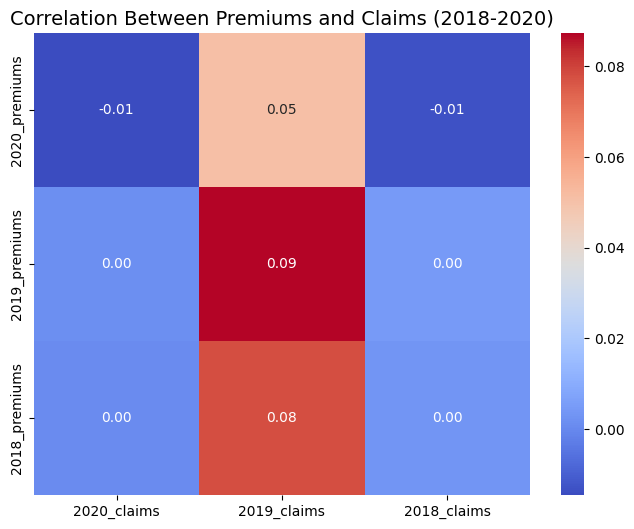

,2020_claims,2019_claims,2018_claims
2020_premiums,-0.01,0.05,-0.01
2019_premiums,0.00,0.09,0.00
2018_premiums,0.00,0.08,0.00


In [70]:
# Merge datasets on STATE and Year)
merged_data = data1_cleaned[['STATE', 2020, 2019, 2018]].merge(
    data2_cleaned[['STATE', 2020, 2019, 2018]], on='STATE', suffixes=('_premiums', '_claims'))


# Display outlier information and correlation matrix
outliers_premium

# Ensure only numeric columns are used for correlation computation
numeric_cols = merged_data.select_dtypes(include=['number'])

# Recompute correlations between Premiums and Claims
correlations_fixed = numeric_cols.corr().loc[['2020_premiums', '2019_premiums', '2018_premiums'],
                                             ['2020_claims', '2019_claims', '2018_claims']]

# Visualize the corrected correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlations_fixed, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Premiums and Claims (2018-2020)', fontsize=14)
plt.show()

correlations_fixed

In [71]:
# Filter for relevant data categories (Frequency and Severity) in both datasets
frequency_severity_data1 = data1_cleaned[
    data1_cleaned['data_category'].str.contains('Frequency|Severity', case=False, na=False)
]
frequency_severity_data2 = data2_cleaned[
    data2_cleaned['data_category'].str.contains('Frequency|Severity', case=False, na=False)
]

# Aggregate frequency and severity by state
aggregated_data1 = frequency_severity_data1.groupby('STATE')[[2020, 2019, 2018]].mean().reset_index()
aggregated_data2 = frequency_severity_data2.groupby('STATE')[[2020, 2019, 2018]].mean().reset_index()

# Merge the datasets to include frequency and severity information
merged_frequency_severity = aggregated_data1.merge(
    aggregated_data2, on='STATE', suffixes=('_data1', '_data2')
)

# Display the first few rows of the merged data to confirm the merge
print("Merged Frequency and Severity Data")
merged_frequency_severity


Merged Frequency and Severity Data


,STATE,2020_data1,2019_data1,2018_data1,2020_data2,2019_data2,2018_data2
0,Alabama,0.83,0.53,-0.11,-0.07,-0.27,-0.11
1,Alaska,0.83,0.52,-0.11,-0.07,-0.27,-0.11
2,Arizona,0.83,0.53,-0.11,-0.07,-0.27,-0.11
3,Arkansas,0.68,0.50,-0.11,-0.07,-0.27,-0.11
4,CW w/o TX and MA,-0.16,-0.50,-0.11,-0.07,-0.27,-0.11
5,CW w/o Texas,-0.68,-0.46,-0.11,-0.07,-0.27,-0.11
6,California,0.79,0.49,-0.11,-0.07,-0.27,-0.11
7,Colorado,0.92,0.57,-0.11,-0.07,-0.27,-0.11
8,Connecticut,0.65,0.46,-0.11,-0.07,-0.27,-0.11
9,Countrywide,0.57,0.44,-0.11,-0.07,-0.27,-0.11


In [72]:
# Calculate risk score as the mean of frequency and severity across the years for each state
merged_frequency_severity['risk_score'] = merged_frequency_severity[
    ['2020_data1', '2019_data1', '2018_data1', '2020_data2', '2019_data2', '2018_data2']
].mean(axis=1)

# Define thresholds for risk categories based on quantiles
risk_thresholds = merged_frequency_severity['risk_score'].quantile([0.25, 0.75])

# Categorize risk levels based on thresholds
def classify_risk(row):
    if row['risk_score'] > risk_thresholds[0.75]:
        return 'High'
    elif row['risk_score'] < risk_thresholds[0.25]:
        return 'Low'
    else:
        return 'Medium'

merged_frequency_severity['Risk_Category'] = merged_frequency_severity.apply(classify_risk, axis=1)

# Display the categorized data to the user
print("States with Risk Categories")
merged_frequency_severity


States with Risk Categories


,STATE,2020_data1,2019_data1,2018_data1,2020_data2,2019_data2,2018_data2,risk_score,Risk_Category
0,Alabama,0.83,0.53,-0.11,-0.07,-0.27,-0.11,0.13,High
1,Alaska,0.83,0.52,-0.11,-0.07,-0.27,-0.11,0.13,Medium
2,Arizona,0.83,0.53,-0.11,-0.07,-0.27,-0.11,0.13,High
3,Arkansas,0.68,0.50,-0.11,-0.07,-0.27,-0.11,0.10,Medium
4,CW w/o TX and MA,-0.16,-0.50,-0.11,-0.07,-0.27,-0.11,-0.20,Low
5,CW w/o Texas,-0.68,-0.46,-0.11,-0.07,-0.27,-0.11,-0.28,Low
6,California,0.79,0.49,-0.11,-0.07,-0.27,-0.11,0.12,Medium
7,Colorado,0.92,0.57,-0.11,-0.07,-0.27,-0.11,0.15,High
8,Connecticut,0.65,0.46,-0.11,-0.07,-0.27,-0.11,0.09,Medium
9,Countrywide,0.57,0.44,-0.11,-0.07,-0.27,-0.11,0.07,Low


In [73]:
# Encode the risk categories into numeric labels
label_encoder = LabelEncoder()
merged_frequency_severity['Risk_Label'] = label_encoder.fit_transform(merged_frequency_severity['Risk_Category'])

# Define features (frequency and severity data) and target (risk labels)
features = ['2020_data1', '2019_data1', '2018_data1', '2020_data2', '2019_data2', '2018_data2']
X = merged_frequency_severity[features]
y = merged_frequency_severity['Risk_Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
report, conf_matrix


('              precision    recall  f1-score   support\n\n        High       1.00      0.80      0.89         5\n         Low       1.00      1.00      1.00         4\n      Medium       0.89      1.00      0.94         8\n\n    accuracy                           0.94        17\n   macro avg       0.96      0.93      0.94        17\nweighted avg       0.95      0.94      0.94        17\n',
 array([[4, 0, 1],
        [0, 4, 0],
        [0, 0, 8]]))

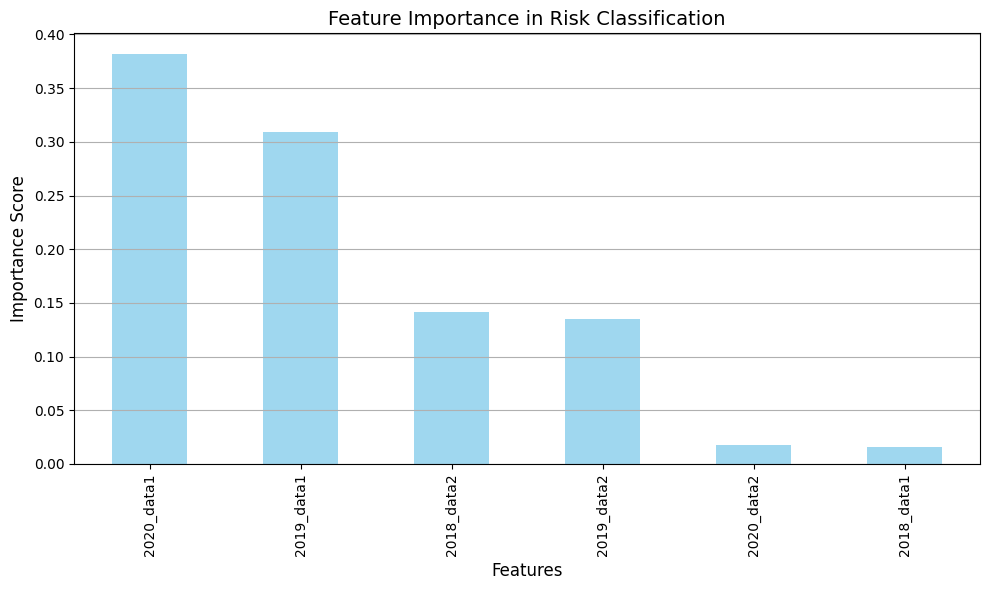

,0
2020_data1,0.38
2019_data1,0.31
2018_data2,0.14
2019_data2,0.13
2020_data2,0.02
2018_data1,0.02


In [74]:

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Feature Importance in Risk Classification', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display feature importance values
feature_importances


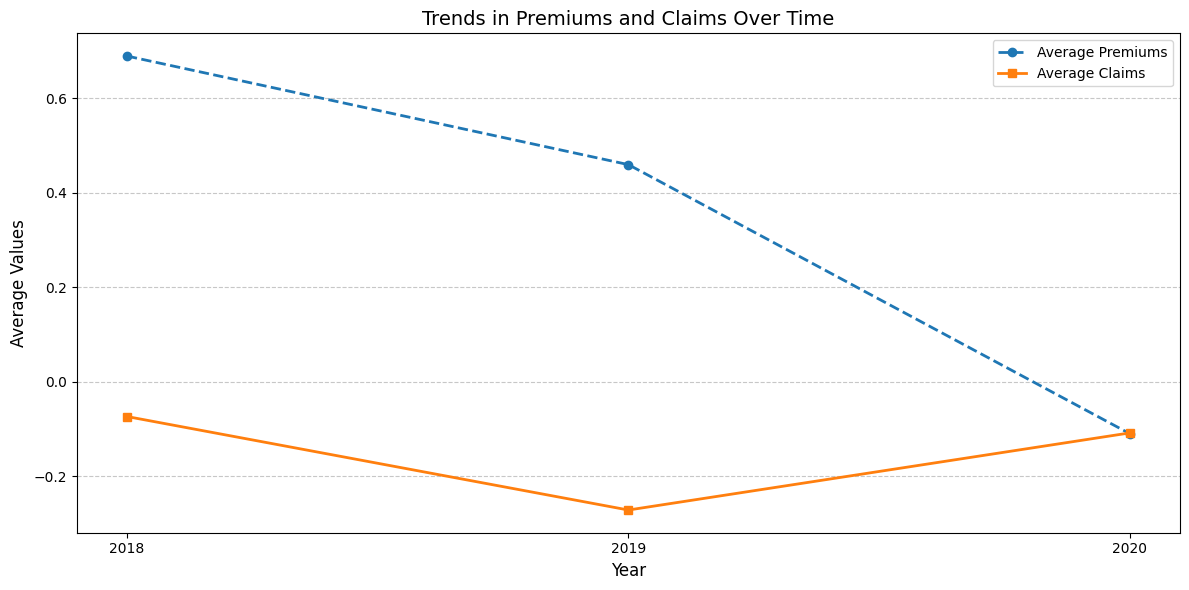

In [75]:
# Time-Series Analysis: Average premiums and claims over the years
time_series_data = merged_frequency_severity[
    ['2020_data1', '2019_data1', '2018_data1', '2020_data2', '2019_data2', '2018_data2']
].mean()

# Split into premiums and claims
premiums = time_series_data[['2020_data1', '2019_data1', '2018_data1']].values
claims = time_series_data[['2020_data2', '2019_data2', '2018_data2']].values
years = ['2018', '2019', '2020']

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(years, premiums, marker='o', label='Average Premiums', linestyle='--', linewidth=2)
plt.plot(years, claims, marker='s', label='Average Claims', linestyle='-', linewidth=2)
plt.title('Trends in Premiums and Claims Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
